### This notebook shows the usage of the light curve package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from light_curve import create_lc, gp_interpolation
import warnings

In [2]:
%config InlineBackend.figure_format ='retina'
warnings.filterwarnings("ignore")

In [3]:
# ===== SN at work ==== #
# ===================== #

# Details of the object under study

Object = 'SN2011aa'
Host = 'PGC021381'
RA = '07:36:42.63'
DEC = '+74:26:34.80'
z = 0.013
EB_V_Gal = 0.065              # Na ID around maximum (Turatto 2003)
EB_V_Gal_err = 0.003
EB_V_Host = 0.0               # Schlafly & Finkbeiner 2011
EB_V_Host_err = 0.0
DM = 33.75
DM_err = 0.27                 # modz  http://leda.univ-lyon1.fr/ledacat.cgi?o=PGC%20021381
JD_offset = 2455000   

In [4]:
object_dir = '/Users/anirbandutta/Documents/SN2011aa_Work/SN2011_Anirban/Photometry/'

optical_mag = object_dir + '2011aa_ubvri_mag'
uvopt_mag = object_dir + '2011aa_uvot_mag'

save_results = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/'
params_file = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/' + Object + '.txt'

In [5]:
# Find data files

# A filter file containing all the required information on bandpasses
FILTER_directory = '/Users/anirbandutta/Dropbox/astromatic/'            # Filter information 
FILTER_data = FILTER_directory+'FILTERS.dat'

#--------------------------------------------------#

In [6]:
# Read the filter file containing data on filters 

filter_df = pd.read_csv(FILTER_data, sep = '\s+')
filter_df = filter_df.replace('INDEF', np.nan).set_index(['FILTER', 'Marker', 'Color']).astype('float64')
filter_df = filter_df.reset_index().set_index('FILTER')
list_filters = filter_df.index.tolist()

In [7]:
# create a light curve class
lc = create_lc(optical_mag)

In [8]:
sn_df = lc.column_to_row(offset=2455000.5)

In [9]:
sn_df = sn_df[sn_df['MAG'] != 99.99]

In [10]:
# # Know your data  bit
# transform from your data table from a wide format to long format
# uvmag_df = lc.get_swift_lc()[0]
# uvmag_df['JD'] = uvmag_df['JD'].apply(lambda x: x + 2400000.5)
# uvmag_df = uvmag_df.dropna()
# print (uvmag_df)

In [11]:
# interpolate the B-band to know the B-band maximum, JD at maximum
# interp = gp_interpolation(uvmag_df, 'B', supernova=Object)

In [12]:
# # Parameters of gp fit.
# # params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
#                               find_two_peaks=False)

In [13]:
# interp.monte_carlo(mc_trials=100, save_results=save_results, Object=Object, store_params=True)

In [14]:
# interp.save_file(params_file, Object, z, RA, DEC, Host, EB_V_Gal, EB_V_Gal_err, EB_V_Host, EB_V_Host_err, DM, DM_err)

In [15]:
#get the rest frame df 
# (t-t0)/(1+z) to first order
rest_frame_df = lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')
#rest_frame_df = rest_frame_df[rest_frame_df['MAG'] != 99.99]

In [16]:
# plot the light curves
uv_lc = create_lc(uvopt_mag)

In [17]:
uvsn_df = uv_lc.column_to_row(offset=2400000)

In [18]:
uvsn_df = uvsn_df[uvsn_df['MAG'] != 99.99]
#print (uvsn_df)

In [19]:
# # interpolate the B-band to know the B-band maximum, JD at maximum
# interp = gp_interpolation(uvsn_df, 'uvb', supernova='SN2011aa')

In [20]:
# Parameters of gp fit.
# params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
#                               find_two_peaks=False)

In [21]:
uv_rest_frame_df = uv_lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')

(23.0, 12.0)

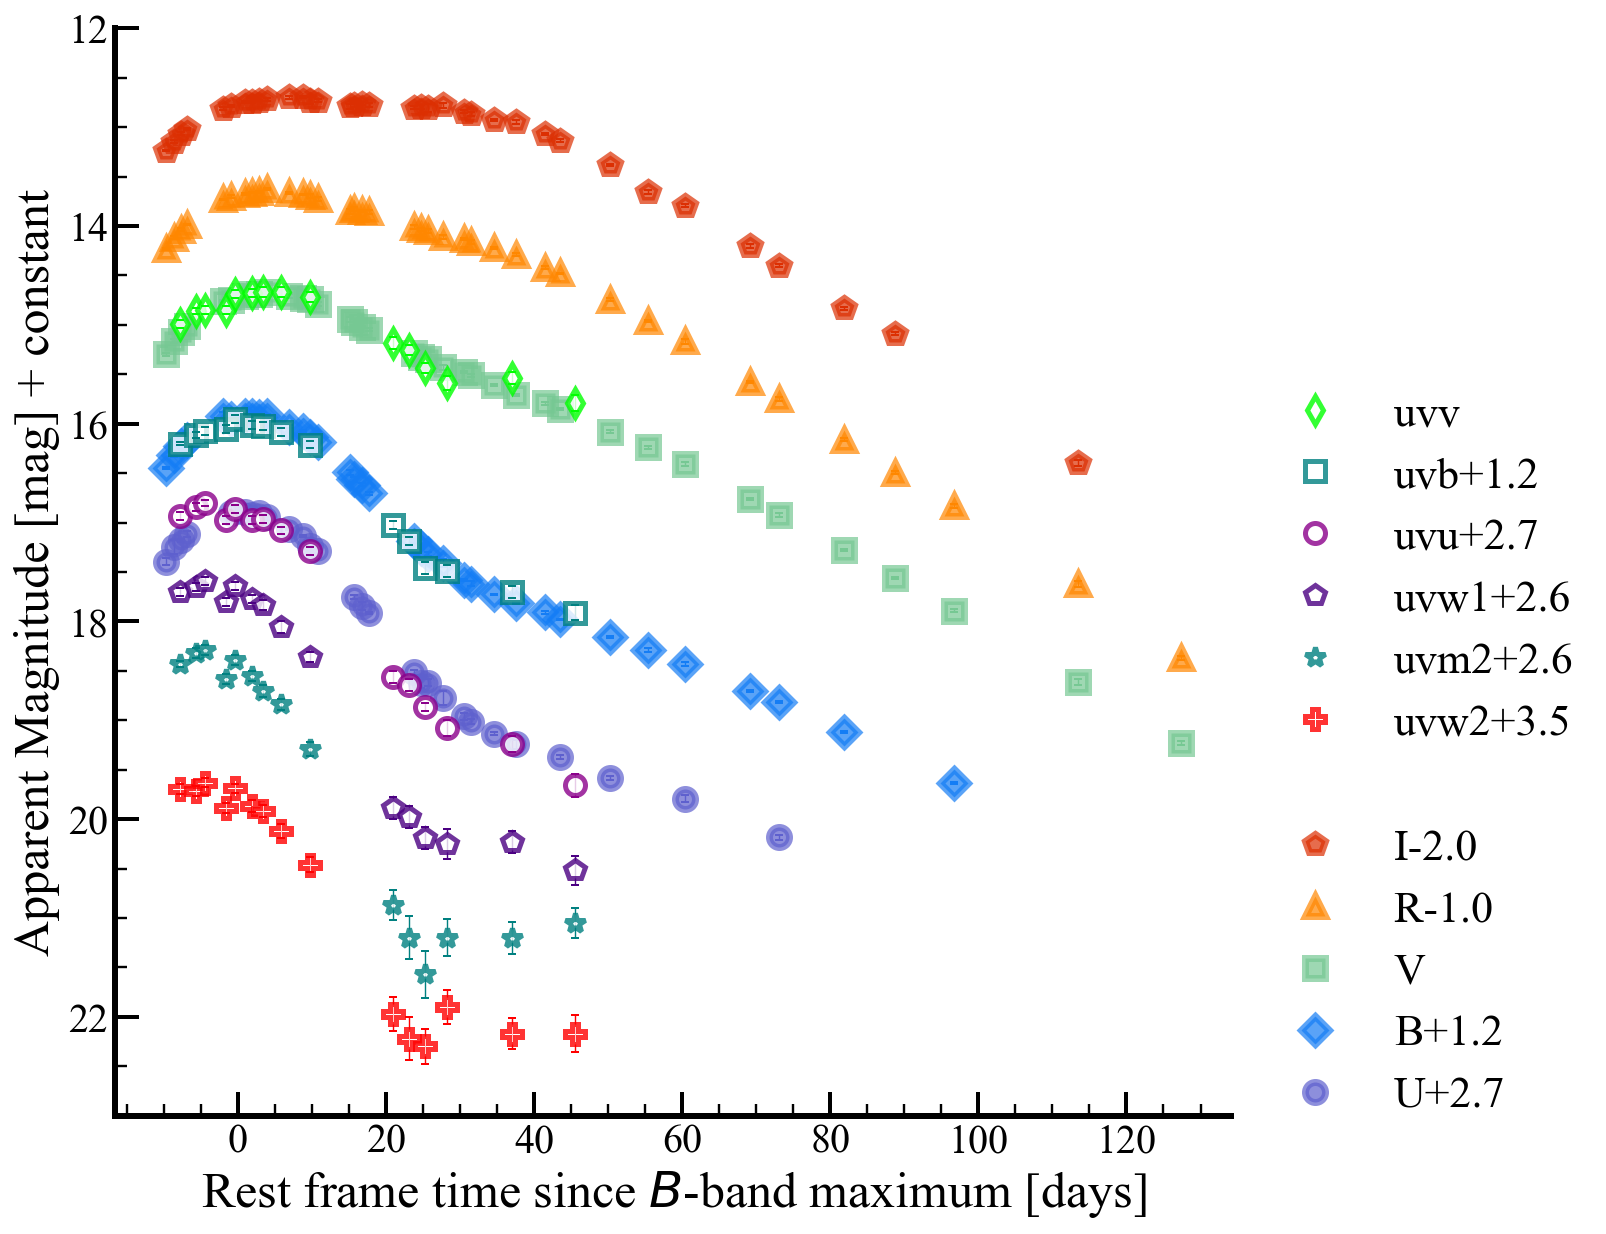

In [33]:
fig_app = plt.figure(figsize = (10, 10))
ax = fig_app.add_subplot(111)
uv_lc.plot_params(ax, ml_x = 20, mil_x = 5, ml_y = 2, mil_y = 0.5, invert=True)
legend_properties = {'size':22, 'weight':'book'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 3
ax.set_ylim(21.0, 11.5)

#-----------------------------------------------------------------------------------------------#
## UBVRI photometry dataframe

offset = [+1.2, -2.0, -1.0, +2.7, +0.0]
str_offset = ['+1.2', '-2.0', '-1.0 ', '+2.7', ' ']
i = 0
line1 =[]
for band, band_df in rest_frame_df.groupby('FILTER'):
    line1 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = filter_df.loc[band, 'Color'],
                    mec = filter_df.loc[band, 'Color'], markeredgewidth=3.5, 
                    marker = filter_df.loc[band, 'Marker'],  markersize = 10,
                    alpha = 0.7, label = str(band) + str_offset[i], ls = ' ')
                    
    ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr = band_df['MERR'], fmt = '',
                c = filter_df.loc[band, 'Color'], ls = '', lw = 0.7, capsize=2, capthick=1)
    
    line1.append(line1)
    
    i = i+1
    
# U: 3, B: 0, V:4, R:2, I:1

handles_1,labels_1 = ax.get_legend_handles_labels()    
handles_1 = [handles_1[1], handles_1[2], handles_1[4], handles_1[0], handles_1[3]]
labels_1 = [labels_1[1], labels_1[2], labels_1[4], labels_1[0], labels_1[3]]
legend_1 = ax.legend(handles_1,labels_1, frameon= False, 
                     fancybox = False, shadow = False, framealpha=0.3, facecolor = 'white', 
                     prop = legend_properties, bbox_to_anchor=(1.0, 0.3))

ax.add_artist(legend_1)

#-----------------------------------------------------------------------------------------------#
## Swift-UVOT dataframe

offset = [+1.2, +2.6, +2.7, 0.0, +2.6, +3.5]
str_offset = ['+1.2', '+2.6', '+2.7', ' ', '+2.6', '+3.5']
i = 0
line2 = []
for band, band_df in uv_rest_frame_df.groupby('FILTER'):
        
        line2 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = 'white', 
                     marker = filter_df.loc[band.lower(), 'Marker'], markersize = 10, label = str(band.lower()) + str_offset[i], ls =' ',
                     markeredgecolor = filter_df.loc[band.lower(), 'Color'], markeredgewidth=2.5, 
                        alpha =0.8)
        ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr=band_df['MERR'], fmt='',
                    c=filter_df.loc[band.lower(), 'Color'], ls='', lw=0.7, capsize=2, capthick=1,
                   label = str(band.lower()) + str_offset[i])

        i = i+1
    

# w2:5, m2:1, w1:4, u:2, v:0, b:3

labels_2 = [l.get_label() for l in line2]
line2 = [line2[3], line2[0], line2[2], line2[4], line2[1], line2[5]]
labels_2 = [labels_2[3], labels_2[0], labels_2[2], labels_2[4], labels_2[1], labels_2[5]]
legend_2 = ax.legend(line2, labels_2, frameon= False, 
                     fancybox = False, framealpha =0.3, shadow = False, facecolor = 'white', 
                     prop = legend_properties, bbox_to_anchor=(1.0, 0.7), numpoints =1)  



ax.set_xlabel(r'Rest frame time since $B$-band maximum [days]', fontsize = 25, fontname='Times New Roman')
ax.set_ylabel(r'Apparent Magnitude [mag] + constant', fontsize = 25, fontname='Times New Roman')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

#ax.set_xlim(-14, 80)
ax.set_ylim(23.0, 12.0)